In [1]:
import starry
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

Pre-computing some matrices... Done.
Pre-computing some matrices... Done.


TypeError: object of type 'TensorVariable' has no len()

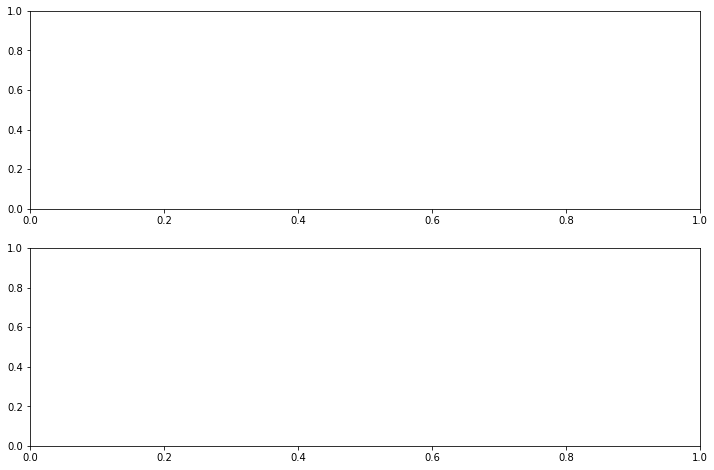

In [2]:
# Define the star
A = starry.Primary(
    starry.Map(udeg=2, rv=True, amp=1, veq=5e4, alpha=0, obl=30),
    r=1.0,
    m=1.0,
    length_unit=u.Rsun,
    mass_unit=u.Msun,
)
A.map[1] = 0.5
A.map[2] = 0.25

# Define the planet
b = starry.Secondary(
    starry.Map(rv=True, amp=0, veq=0),
    r=0.1,
    porb=1.0,
    m=0.01,
    t0=0.0,
    inc=80.0,
    ecc=0.3,
    w=60,
    length_unit=u.Rsun,
    mass_unit=u.Msun,
    angle_unit=u.degree,
    time_unit=u.day,
)

# Define the system
sys = starry.System(A, b)

# Compute the flux & RV signal
time = np.linspace(-0.5, 0.5, 1000)
flux = sys.flux(time)
rv = sys.rv(time)

# Plot it
fig, ax = plt.subplots(2, figsize=(12, 8))
ax[0].plot(time, flux)
ax[1].plot(time, rv)
ax[1].set_xlabel("time [days]", fontsize=24)
ax[0].set_ylabel("flux [normalized]", fontsize=24)
ax[1].set_ylabel("radial velocity [m / s]", fontsize=24);